In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatteryhhb 
import re
import seaborn as sns

SQL Query
```
-- SELECT COUNT(*) FROM mt5.deal
-- WHERE
--   symbol = 'Volatility 75 Index'
--   AND time_deal >= '2025-07-02'
--   AND time_deal < '2025-07-03'
SELECT 
	deal, 
	login, 
	time_deal, 
	"order" as order, 
	"action" as action, 
	entry, 
	contract_size, 
	price, 
	price_usd,
	volume, 
	volume_ext, 
	volume_closed_ext, 
	volume_usd, 
	profit, 
	position_id, 
	symbol
FROM 
	mt5.deal
WHERE
  symbol = 'Volatility 75 Index'
  AND time_deal >= '2025-07-06'
  AND time_deal < '2025-07-07'
```

## Questions to Answer

1. Exposure change event arrival rate? important? Exposure change event = an action by client not one round trip trade
2. Min-max range of exposure 
3. Complete trade duration and action interval by clients statistics: average, min, max, median, std => helps to determine how frequent the index generator params update.



In [2]:
symbol = 'Vol 75'

converted_symbol = re.sub(r'\s+', '_', symbol.lower())
folder_path = f"/Users/cko/Documents/Deriv/supply_demand_index/data/trade/{converted_symbol}/"
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

df_list = [pd.read_csv(f) for f in all_files]
df = pd.concat(df_list, ignore_index=True)
df

,deal,login,time_deal,order,action,entry,contract_size,price,price_usd,volume,volume_ext,volume_closed_ext,volume_usd,profit,position_id,symbol
0,5126933314,80491272,2025-07-05T00:00:00.273Z,5122170602,1,0,1.0,104528.77,104528.77,10,100000,0,104.52877,0.00,5122170602,Volatility 75 Index
1,9104276376,140171374,2025-07-05T00:00:00.915Z,9101357990,1,1,1.0,104530.87,104530.87,500,5000000,5000000,5226.54350,-10.22,9101357338,Volatility 75 Index
2,60226785844,100945434,2025-07-05T00:00:00.967Z,60193478592,1,1,1.0,104530.87,104530.87,1000,10000000,10000000,10453.08700,-71.00,60193476910,Volatility 75 Index
3,20475779826,21835546,2025-07-05T00:00:00.974Z,20438957701,1,1,1.0,104530.87,104530.87,100,1000000,1000000,1045.30870,-1.50,20438956901,Volatility 75 Index
4,5126933318,80421017,2025-07-05T00:00:01.109Z,5122170606,1,0,1.0,104520.65,104520.65,10,100000,0,104.52065,0.00,5122170606,Volatility 75 Index
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755595,40215567601,62199803,2025-07-01T23:59:54.709Z,40570731752,0,0,1.0,100582.26,100582.26,200,2000000,0,2011.64520,0.00,40570731752,Volatility 75 Index
1755596,9102692374,140144440,2025-07-01T23:59:56.239Z,9099845885,0,0,1.0,100582.26,100582.26,10,100000,0,100.58226,0.00,9099845885,Volatility 75 Index
1755597,60224993702,101398204,2025-07-01T23:59:57.258Z,60191704881,1,0,1.0,100534.95,100534.95,10,100000,0,100.53495,0.00,60191704881,Volatility 75 Index
1755598,60224993703,101454532,2025-07-01T23:59:58.03Z,60191704883,0,0,1.0,100564.99,100564.99,10,100000,0,100.56499,0.00,60191704883,Volatility 75 Index


In [3]:
df['time_deal'] = pd.to_datetime(df['time_deal'], errors='coerce', format='ISO8601').dt.tz_localize(None)
df = df.sort_values(by='time_deal', ignore_index=True)
df

,deal,login,time_deal,order,action,entry,contract_size,price,price_usd,volume,volume_ext,volume_closed_ext,volume_usd,profit,position_id,symbol
0,20473263046,21675745,2025-07-01 00:00:00.083,20436549726,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,20436549726,Volatility 75 Index
1,40214847270,62091847,2025-07-01 00:00:00.208,40570028989,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,40570028989,Volatility 75 Index
2,40214847271,61227224,2025-07-01 00:00:00.368,40570028990,1,1,1.0,101646.22,101646.22,110,1100000,1100000,1118.10842,0.19,40570027017,Volatility 75 Index
3,20473263049,21756765,2025-07-01 00:00:00.422,20436549729,1,0,1.0,101646.22,101646.22,10,100000,0,101.64622,0.00,20436549729,Volatility 75 Index
4,40214847273,62198938,2025-07-01 00:00:00.554,40570028991,0,1,1.0,101676.26,101676.26,10,100000,100000,101.67626,0.44,40570018292,Volatility 75 Index
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755595,5127176711,80193630,2025-07-05 23:59:56.134,5122399144,0,1,1.0,103259.58,103259.58,200,2000000,2000000,2065.19160,0.29,5122398949,Volatility 75 Index
1755596,40218454077,62093125,2025-07-05 23:59:57.553,40573547236,1,0,1.0,103219.33,103219.33,10,100000,0,103.21933,0.00,40573547236,Volatility 75 Index
1755597,5127176717,80432202,2025-07-05 23:59:58.052,5122399151,0,0,1.0,103259.58,103259.58,300,3000000,0,3097.78740,0.00,5122399151,Volatility 75 Index
1755598,9104762646,140231533,2025-07-05 23:59:58.073,9101826510,0,1,1.0,103249.37,103249.37,200,2000000,2000000,2064.98740,-3.06,9101825511,Volatility 75 Index


In [4]:
mask = df['position_id'].duplicated(keep=False)
result = df[mask]
result

,deal,login,time_deal,order,action,entry,contract_size,price,price_usd,volume,volume_ext,volume_closed_ext,volume_usd,profit,position_id,symbol
0,20473263046,21675745,2025-07-01 00:00:00.083,20436549726,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,20436549726,Volatility 75 Index
1,40214847270,62091847,2025-07-01 00:00:00.208,40570028989,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,40570028989,Volatility 75 Index
3,20473263049,21756765,2025-07-01 00:00:00.422,20436549729,1,0,1.0,101646.22,101646.22,10,100000,0,101.64622,0.00,20436549729,Volatility 75 Index
5,20473263050,21760537,2025-07-01 00:00:01.075,20436549730,1,0,1.0,101646.22,101646.22,10,100000,0,101.64622,0.00,20436549730,Volatility 75 Index
7,60224380004,101549915,2025-07-01 00:00:01.979,60191106574,0,0,1.0,101668.84,101668.84,10,100000,0,101.66884,0.00,60191106574,Volatility 75 Index
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755592,3539759221,41574861,2025-07-05 23:59:54.299,3525854092,1,1,1.0,103211.98,103211.98,10,100000,100000,103.21198,0.02,3525852879,Volatility 75 Index
1755593,40218454022,62200154,2025-07-05 23:59:55.050,40573547179,0,1,1.0,103242.02,103242.02,50,500000,500000,516.21010,-0.74,40573546622,Volatility 75 Index
1755595,5127176711,80193630,2025-07-05 23:59:56.134,5122399144,0,1,1.0,103259.58,103259.58,200,2000000,2000000,2065.19160,0.29,5122398949,Volatility 75 Index
1755598,9104762646,140231533,2025-07-05 23:59:58.073,9101826510,0,1,1.0,103249.37,103249.37,200,2000000,2000000,2064.98740,-3.06,9101825511,Volatility 75 Index


In [5]:
conditions = [
    (df['action'] == 0),
    (df['action'] == 1)
]
choices = [
    -df['volume_usd'],
    df['volume_usd'],
]

df['company_exposure_usd'] = np.cumsum(np.select(conditions, choices))


# Compute time delta in **hours**
dt = df['time_deal'].diff().dt.total_seconds()
dt_hours = df['time_deal'].diff().dt.total_seconds() / 3600

# Compute value delta
dy = df['company_exposure_usd'].diff()

# Numerical derivative (rate of change per hour)
df['exposure_rate_per_sec'] = dy / dt

df

,deal,login,time_deal,order,action,entry,contract_size,price,price_usd,volume,volume_ext,volume_closed_ext,volume_usd,profit,position_id,symbol,company_exposure_usd,exposure_rate_per_sec
0,20473263046,21675745,2025-07-01 00:00:00.083,20436549726,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,20436549726,Volatility 75 Index,-101.67626,NaN
1,40214847270,62091847,2025-07-01 00:00:00.208,40570028989,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,40570028989,Volatility 75 Index,-203.35252,-813.410080
2,40214847271,61227224,2025-07-01 00:00:00.368,40570028990,1,1,1.0,101646.22,101646.22,110,1100000,1100000,1118.10842,0.19,40570027017,Volatility 75 Index,914.75590,6988.177625
3,20473263049,21756765,2025-07-01 00:00:00.422,20436549729,1,0,1.0,101646.22,101646.22,10,100000,0,101.64622,0.00,20436549729,Volatility 75 Index,1016.40212,1882.337407
4,40214847273,62198938,2025-07-01 00:00:00.554,40570028991,0,1,1.0,101676.26,101676.26,10,100000,100000,101.67626,0.44,40570018292,Volatility 75 Index,914.72586,-770.274697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755595,5127176711,80193630,2025-07-05 23:59:56.134,5122399144,0,1,1.0,103259.58,103259.58,200,2000000,2000000,2065.19160,0.29,5122398949,Volatility 75 Index,-53080.42113,-52953.630769
1755596,40218454077,62093125,2025-07-05 23:59:57.553,40573547236,1,0,1.0,103219.33,103219.33,10,100000,0,103.21933,0.00,40573547236,Volatility 75 Index,-52977.20180,72.740895
1755597,5127176717,80432202,2025-07-05 23:59:58.052,5122399151,0,0,1.0,103259.58,103259.58,300,3000000,0,3097.78740,0.00,5122399151,Volatility 75 Index,-56074.98920,-6207.990782
1755598,9104762646,140231533,2025-07-05 23:59:58.073,9101826510,0,1,1.0,103249.37,103249.37,200,2000000,2000000,2064.98740,-3.06,9101825511,Volatility 75 Index,-58139.97660,-98332.733333


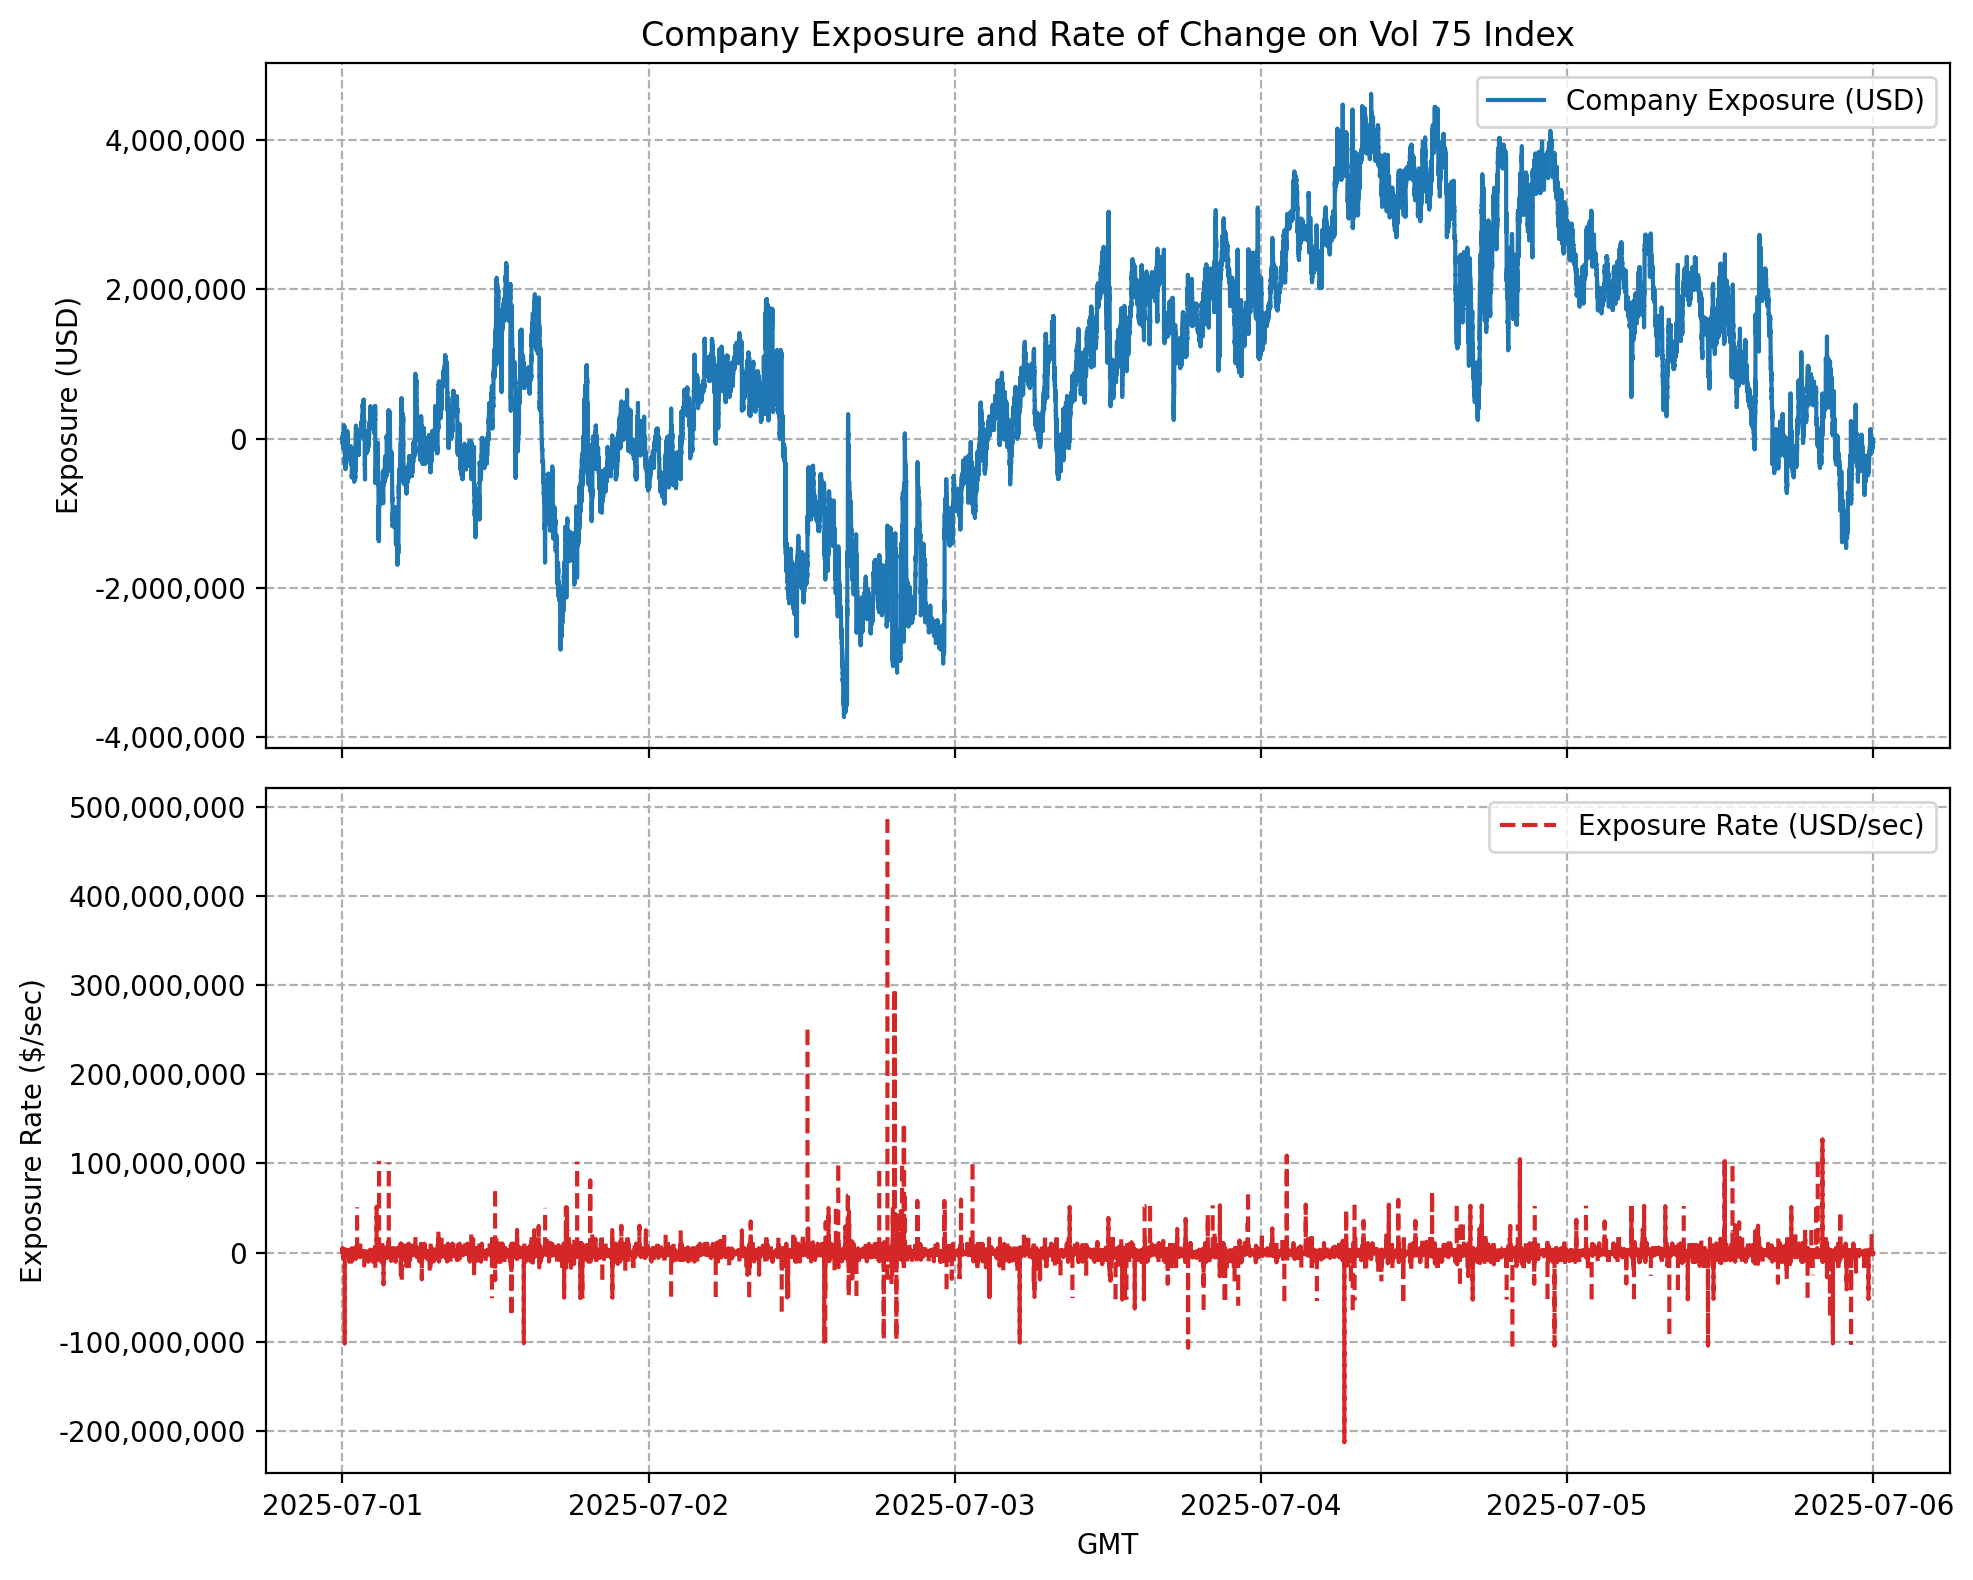

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), dpi=200, sharex=True)

# First subplot: Exposure
axs[0].plot(df['time_deal'], df['company_exposure_usd'], label='Company Exposure (USD)', color='tab:blue')
axs[0].set_title(f'Company Exposure and Rate of Change on {symbol} Index')
axs[0].set_ylabel('Exposure (USD)')
axs[0].grid(True, linestyle='--', alpha=1)
axs[0].legend()
axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Second subplot: Rate of change
axs[1].plot(df['time_deal'], df['exposure_rate_per_sec'], label='Exposure Rate (USD/sec)', color='tab:red', linestyle='--')
axs[1].set_xlabel('GMT')
axs[1].set_ylabel('Exposure Rate ($/sec)')
axs[1].grid(True, linestyle='--', alpha=1)
axs[1].legend()
axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

In [7]:
df

,deal,login,time_deal,order,action,entry,contract_size,price,price_usd,volume,volume_ext,volume_closed_ext,volume_usd,profit,position_id,symbol,company_exposure_usd,exposure_rate_per_sec
0,20473263046,21675745,2025-07-01 00:00:00.083,20436549726,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,20436549726,Volatility 75 Index,-101.67626,NaN
1,40214847270,62091847,2025-07-01 00:00:00.208,40570028989,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,40570028989,Volatility 75 Index,-203.35252,-813.410080
2,40214847271,61227224,2025-07-01 00:00:00.368,40570028990,1,1,1.0,101646.22,101646.22,110,1100000,1100000,1118.10842,0.19,40570027017,Volatility 75 Index,914.75590,6988.177625
3,20473263049,21756765,2025-07-01 00:00:00.422,20436549729,1,0,1.0,101646.22,101646.22,10,100000,0,101.64622,0.00,20436549729,Volatility 75 Index,1016.40212,1882.337407
4,40214847273,62198938,2025-07-01 00:00:00.554,40570028991,0,1,1.0,101676.26,101676.26,10,100000,100000,101.67626,0.44,40570018292,Volatility 75 Index,914.72586,-770.274697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755595,5127176711,80193630,2025-07-05 23:59:56.134,5122399144,0,1,1.0,103259.58,103259.58,200,2000000,2000000,2065.19160,0.29,5122398949,Volatility 75 Index,-53080.42113,-52953.630769
1755596,40218454077,62093125,2025-07-05 23:59:57.553,40573547236,1,0,1.0,103219.33,103219.33,10,100000,0,103.21933,0.00,40573547236,Volatility 75 Index,-52977.20180,72.740895
1755597,5127176717,80432202,2025-07-05 23:59:58.052,5122399151,0,0,1.0,103259.58,103259.58,300,3000000,0,3097.78740,0.00,5122399151,Volatility 75 Index,-56074.98920,-6207.990782
1755598,9104762646,140231533,2025-07-05 23:59:58.073,9101826510,0,1,1.0,103249.37,103249.37,200,2000000,2000000,2064.98740,-3.06,9101825511,Volatility 75 Index,-58139.97660,-98332.733333


In [8]:
# for reference: deal_entry_map = {0: 'IN', 1: 'OUT', 3: 'INOUT'}
ids = df[df['entry'].isin([0, 1])]['position_id'].value_counts() # only cares about one IN then OUT
ids_pair = ids[ids == 2].index

df_pair = df[df['position_id'].isin(ids_pair)].reset_index(drop=True)
print(f'{df_pair.shape[0]/df.shape[0]:.2%} of original df')
df_pair

98.22% of original df


,deal,login,time_deal,order,action,entry,contract_size,price,price_usd,volume,volume_ext,volume_closed_ext,volume_usd,profit,position_id,symbol,company_exposure_usd,exposure_rate_per_sec
0,20473263046,21675745,2025-07-01 00:00:00.083,20436549726,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,20436549726,Volatility 75 Index,-101.67626,NaN
1,40214847270,62091847,2025-07-01 00:00:00.208,40570028989,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,40570028989,Volatility 75 Index,-203.35252,-813.410080
2,20473263049,21756765,2025-07-01 00:00:00.422,20436549729,1,0,1.0,101646.22,101646.22,10,100000,0,101.64622,0.00,20436549729,Volatility 75 Index,1016.40212,1882.337407
3,20473263050,21760537,2025-07-01 00:00:01.075,20436549730,1,0,1.0,101646.22,101646.22,10,100000,0,101.64622,0.00,20436549730,Volatility 75 Index,1016.37208,195.098311
4,60224380004,101549915,2025-07-01 00:00:01.979,60191106574,0,0,1.0,101668.84,101668.84,10,100000,0,101.66884,0.00,60191106574,Volatility 75 Index,1016.34204,-521.378667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724282,3539759221,41574861,2025-07-05 23:59:54.299,3525854092,1,1,1.0,103211.98,103211.98,10,100000,100000,103.21198,0.02,3525852879,Volatility 75 Index,-49982.80933,174.639560
1724283,40218454022,62200154,2025-07-05 23:59:55.050,40573547179,0,1,1.0,103242.02,103242.02,50,500000,500000,516.21010,-0.74,40573546622,Volatility 75 Index,-50499.01943,-687.363648
1724284,5127176711,80193630,2025-07-05 23:59:56.134,5122399144,0,1,1.0,103259.58,103259.58,200,2000000,2000000,2065.19160,0.29,5122398949,Volatility 75 Index,-53080.42113,-52953.630769
1724285,9104762646,140231533,2025-07-05 23:59:58.073,9101826510,0,1,1.0,103249.37,103249.37,200,2000000,2000000,2064.98740,-3.06,9101825511,Volatility 75 Index,-58139.97660,-98332.733333


In [9]:
g = df_pair.groupby('position_id').agg(
    action_count=('action', 'nunique'),
    entry_count=('entry', 'nunique')
)
# Filter for position_id where either count is NOT 2
ids_complete = g[(g['entry_count'] == 2)].index

df_complete = df_pair[df_pair['position_id'].isin(ids_complete)].reset_index(drop=True)
print(f'{df_complete.shape[0]/df_pair.shape[0]:.2%} of pair df')
print(f'{df_complete.shape[0]/df.shape[0]:.2%} of original df')
df_complete

99.94% of pair df
98.16% of original df


,deal,login,time_deal,order,action,entry,contract_size,price,price_usd,volume,volume_ext,volume_closed_ext,volume_usd,profit,position_id,symbol,company_exposure_usd,exposure_rate_per_sec
0,20473263046,21675745,2025-07-01 00:00:00.083,20436549726,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,20436549726,Volatility 75 Index,-101.67626,NaN
1,40214847270,62091847,2025-07-01 00:00:00.208,40570028989,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,40570028989,Volatility 75 Index,-203.35252,-813.410080
2,20473263049,21756765,2025-07-01 00:00:00.422,20436549729,1,0,1.0,101646.22,101646.22,10,100000,0,101.64622,0.00,20436549729,Volatility 75 Index,1016.40212,1882.337407
3,20473263050,21760537,2025-07-01 00:00:01.075,20436549730,1,0,1.0,101646.22,101646.22,10,100000,0,101.64622,0.00,20436549730,Volatility 75 Index,1016.37208,195.098311
4,60224380004,101549915,2025-07-01 00:00:01.979,60191106574,0,0,1.0,101668.84,101668.84,10,100000,0,101.66884,0.00,60191106574,Volatility 75 Index,1016.34204,-521.378667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723295,3539759221,41574861,2025-07-05 23:59:54.299,3525854092,1,1,1.0,103211.98,103211.98,10,100000,100000,103.21198,0.02,3525852879,Volatility 75 Index,-49982.80933,174.639560
1723296,40218454022,62200154,2025-07-05 23:59:55.050,40573547179,0,1,1.0,103242.02,103242.02,50,500000,500000,516.21010,-0.74,40573546622,Volatility 75 Index,-50499.01943,-687.363648
1723297,5127176711,80193630,2025-07-05 23:59:56.134,5122399144,0,1,1.0,103259.58,103259.58,200,2000000,2000000,2065.19160,0.29,5122398949,Volatility 75 Index,-53080.42113,-52953.630769
1723298,9104762646,140231533,2025-07-05 23:59:58.073,9101826510,0,1,1.0,103249.37,103249.37,200,2000000,2000000,2064.98740,-3.06,9101825511,Volatility 75 Index,-58139.97660,-98332.733333


In [10]:
df1 = df_complete.copy()
df1

,deal,login,time_deal,order,action,entry,contract_size,price,price_usd,volume,volume_ext,volume_closed_ext,volume_usd,profit,position_id,symbol,company_exposure_usd,exposure_rate_per_sec
0,20473263046,21675745,2025-07-01 00:00:00.083,20436549726,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,20436549726,Volatility 75 Index,-101.67626,NaN
1,40214847270,62091847,2025-07-01 00:00:00.208,40570028989,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,40570028989,Volatility 75 Index,-203.35252,-813.410080
2,20473263049,21756765,2025-07-01 00:00:00.422,20436549729,1,0,1.0,101646.22,101646.22,10,100000,0,101.64622,0.00,20436549729,Volatility 75 Index,1016.40212,1882.337407
3,20473263050,21760537,2025-07-01 00:00:01.075,20436549730,1,0,1.0,101646.22,101646.22,10,100000,0,101.64622,0.00,20436549730,Volatility 75 Index,1016.37208,195.098311
4,60224380004,101549915,2025-07-01 00:00:01.979,60191106574,0,0,1.0,101668.84,101668.84,10,100000,0,101.66884,0.00,60191106574,Volatility 75 Index,1016.34204,-521.378667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723295,3539759221,41574861,2025-07-05 23:59:54.299,3525854092,1,1,1.0,103211.98,103211.98,10,100000,100000,103.21198,0.02,3525852879,Volatility 75 Index,-49982.80933,174.639560
1723296,40218454022,62200154,2025-07-05 23:59:55.050,40573547179,0,1,1.0,103242.02,103242.02,50,500000,500000,516.21010,-0.74,40573546622,Volatility 75 Index,-50499.01943,-687.363648
1723297,5127176711,80193630,2025-07-05 23:59:56.134,5122399144,0,1,1.0,103259.58,103259.58,200,2000000,2000000,2065.19160,0.29,5122398949,Volatility 75 Index,-53080.42113,-52953.630769
1723298,9104762646,140231533,2025-07-05 23:59:58.073,9101826510,0,1,1.0,103249.37,103249.37,200,2000000,2000000,2064.98740,-3.06,9101825511,Volatility 75 Index,-58139.97660,-98332.733333


In [11]:
df1['trade_duration_sec']=\
df1.groupby('position_id')['time_deal'].diff().dt.total_seconds()
df1

,deal,login,time_deal,order,action,entry,contract_size,price,price_usd,volume,volume_ext,volume_closed_ext,volume_usd,profit,position_id,symbol,company_exposure_usd,exposure_rate_per_sec,trade_duration_sec
0,20473263046,21675745,2025-07-01 00:00:00.083,20436549726,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,20436549726,Volatility 75 Index,-101.67626,NaN,NaN
1,40214847270,62091847,2025-07-01 00:00:00.208,40570028989,0,0,1.0,101676.26,101676.26,10,100000,0,101.67626,0.00,40570028989,Volatility 75 Index,-203.35252,-813.410080,NaN
2,20473263049,21756765,2025-07-01 00:00:00.422,20436549729,1,0,1.0,101646.22,101646.22,10,100000,0,101.64622,0.00,20436549729,Volatility 75 Index,1016.40212,1882.337407,NaN
3,20473263050,21760537,2025-07-01 00:00:01.075,20436549730,1,0,1.0,101646.22,101646.22,10,100000,0,101.64622,0.00,20436549730,Volatility 75 Index,1016.37208,195.098311,NaN
4,60224380004,101549915,2025-07-01 00:00:01.979,60191106574,0,0,1.0,101668.84,101668.84,10,100000,0,101.66884,0.00,60191106574,Volatility 75 Index,1016.34204,-521.378667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723295,3539759221,41574861,2025-07-05 23:59:54.299,3525854092,1,1,1.0,103211.98,103211.98,10,100000,100000,103.21198,0.02,3525852879,Volatility 75 Index,-49982.80933,174.639560,795.024
1723296,40218454022,62200154,2025-07-05 23:59:55.050,40573547179,0,1,1.0,103242.02,103242.02,50,500000,500000,516.21010,-0.74,40573546622,Volatility 75 Index,-50499.01943,-687.363648,93.959
1723297,5127176711,80193630,2025-07-05 23:59:56.134,5122399144,0,1,1.0,103259.58,103259.58,200,2000000,2000000,2065.19160,0.29,5122398949,Volatility 75 Index,-53080.42113,-52953.630769,147.353
1723298,9104762646,140231533,2025-07-05 23:59:58.073,9101826510,0,1,1.0,103249.37,103249.37,200,2000000,2000000,2064.98740,-3.06,9101825511,Volatility 75 Index,-58139.97660,-98332.733333,397.995


In [15]:
df1['trade_duration_sec'].describe()

count    861650.000000
mean       3170.582238
std       11176.481478
min           0.007000
25%         125.910000
50%         453.491000
75%        1800.009250
max      397676.481000
Name: trade_duration_sec, dtype: float64

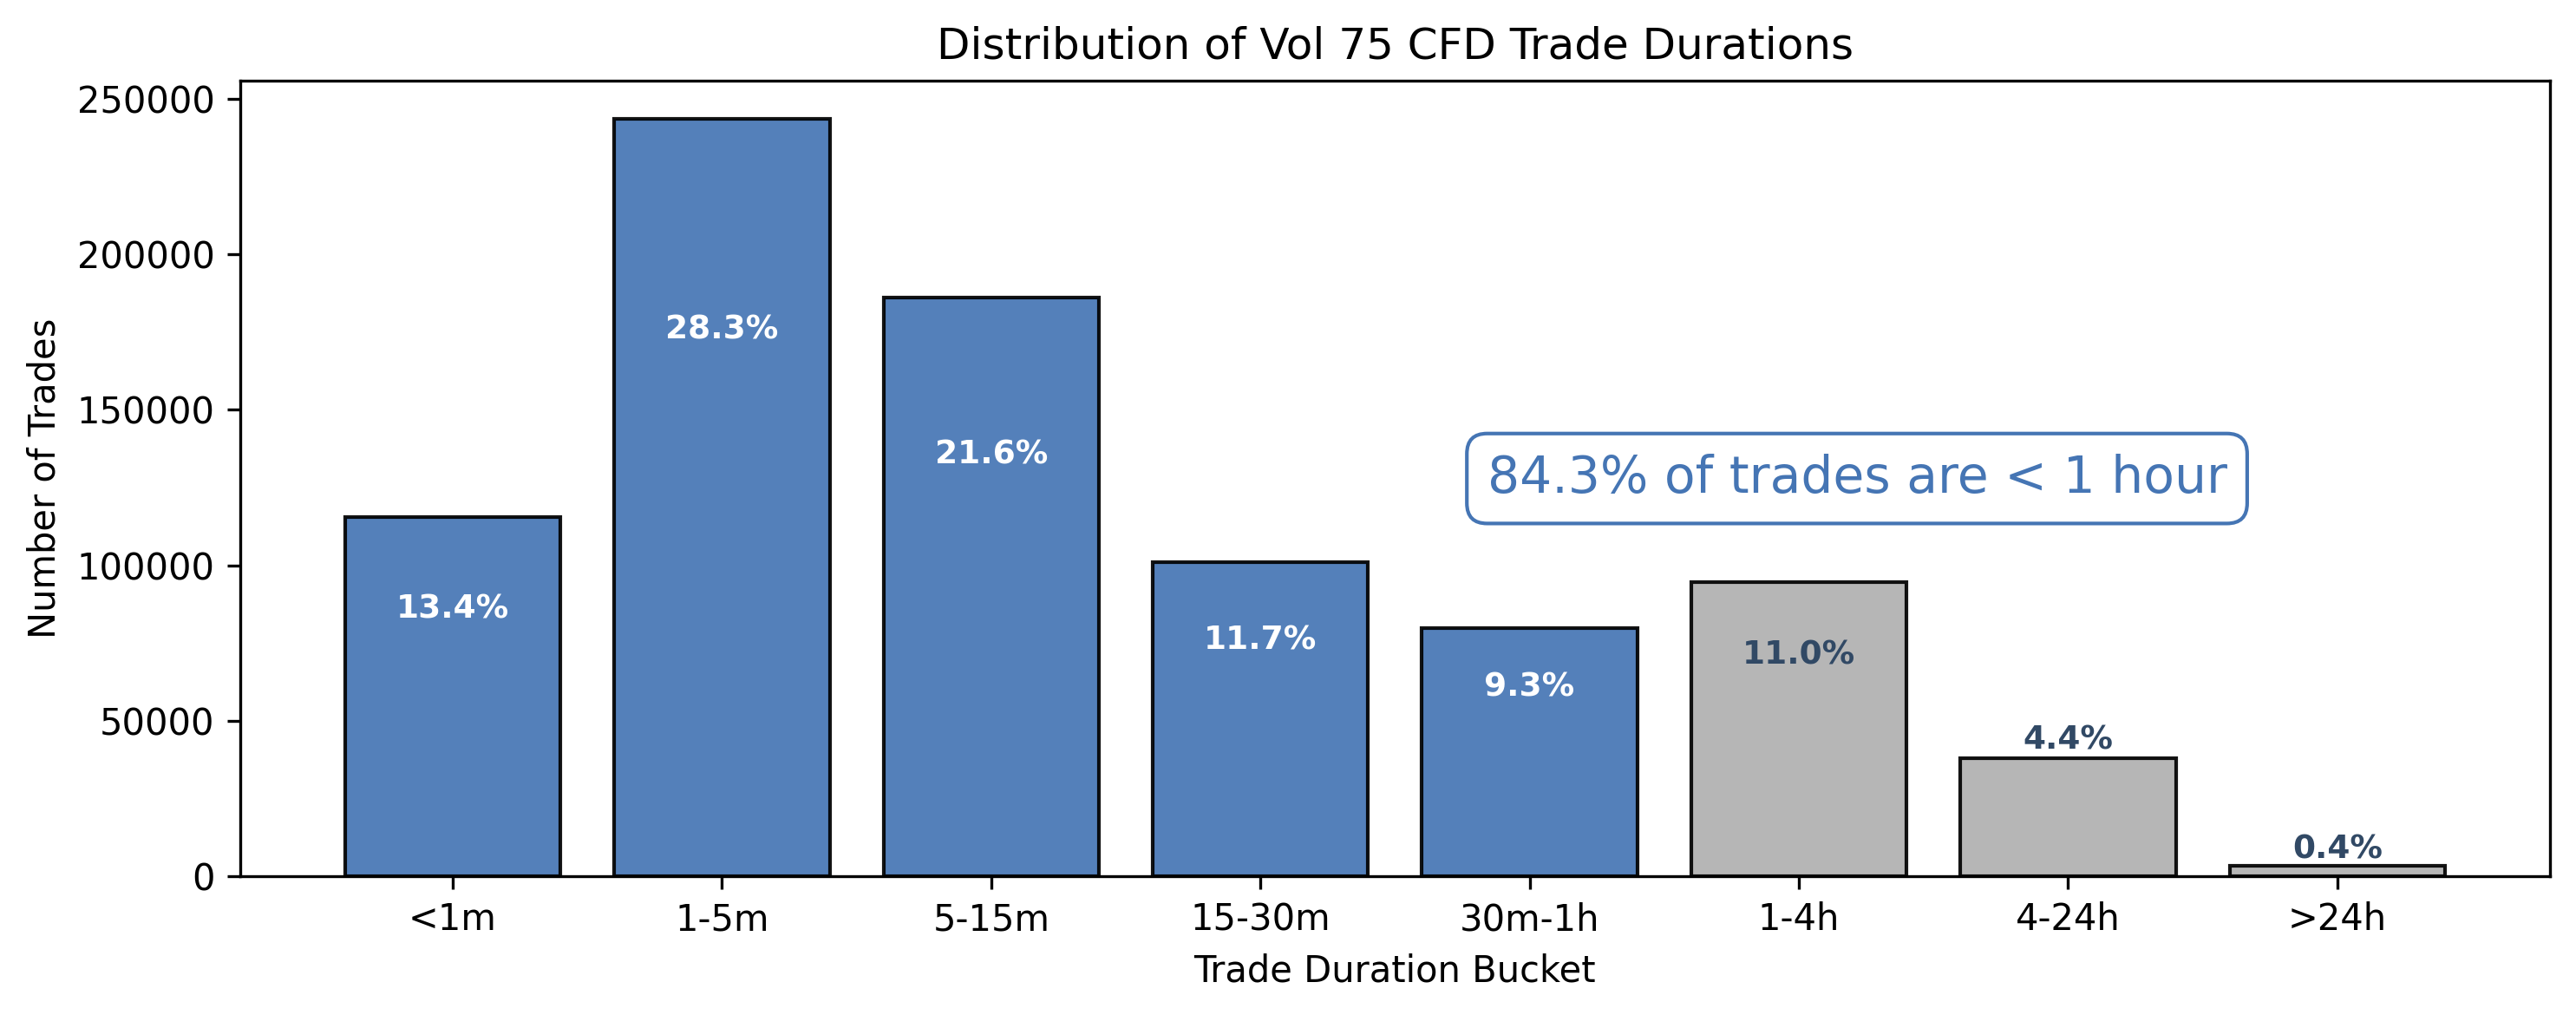

In [16]:
# Binning and summary
bins = [0, 60, 300, 900, 1800, 3600, 14400, 86400, float('inf')]
labels = ['<1m', '1-5m', '5-15m', '15-30m', '30m-1h', '1-4h', '4-24h', '>24h']
df1['duration_bucket'] = pd.cut(df1['trade_duration_sec'], bins=bins, labels=labels, right=False)

bin_counts = df1['duration_bucket'].value_counts().sort_index()
bin_percentages = (bin_counts / bin_counts.sum()) * 100
cumulative = bin_percentages.cumsum()

plt.figure(figsize=(10, 4), dpi=300)

# Highlight bins < 1h in blue, others in gray
highlight_bins = ['<1m', '1-5m', '5-15m', '15-30m', '30m-1h']
highlight_idx = [i for i, l in enumerate(labels) if l in highlight_bins and l in bin_counts.index]
colors = ['#b0b0b0'] * len(bin_counts)
for i in highlight_idx:
    colors[i] = '#4575b4'

bars = plt.bar(bin_counts.index, bin_counts.values, color=colors, edgecolor='black', alpha=0.92)

plt.ylabel('Number of Trades')

# Place percent labels on bars
max_count = bin_counts.max()
for i, pct in enumerate(bin_percentages.values):
    bar_height = bin_counts.values[i]
    y_pos = bar_height * 0.7 if bar_height > max_count * 0.3 else bar_height * 1.02
    color = 'white' if bar_height > max_count * 0.3 and colors[i] != '#b0b0b0' else '#314965'
    plt.text(i, y_pos, f"{pct:.1f}%", ha='center', va='bottom', color=color, fontsize=9, fontweight='bold')

# Calculate % below 1h
below_1h_mask = [l in highlight_bins for l in bin_counts.index]
pct_below_1h = bin_percentages[below_1h_mask].sum()

# --- Place summary annotation in the top right INSIDE the axes ---
plt.gca().text(
    0.70, 0.5,  # Center of the plot area (50% x, 50% y)
    f"{pct_below_1h:.1f}% of trades are < 1 hour",
    fontsize=14, color='#4575b4',
    bbox=dict(facecolor='white', edgecolor='#4575b4', boxstyle='round,pad=0.4'),
    ha='center', va='center',
    transform=plt.gca().transAxes
)

plt.xlabel('Trade Duration Bucket')
plt.title('Distribution of Vol 75 CFD Trade Durations')
plt.tight_layout()
plt.show()

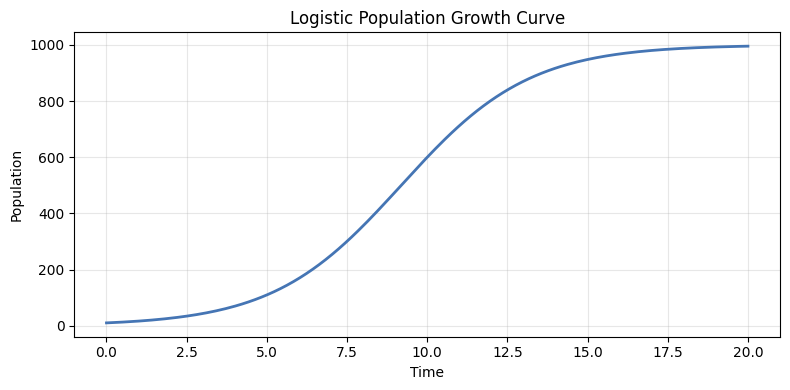

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
K = 1000      # Carrying capacity
N0 = 10       # Initial population
r = 0.5       # Growth rate
t = np.linspace(0, 20, 200)  # Time from 0 to 20 units

# Logistic growth function
N = K / (1 + ((K - N0) / N0) * np.exp(-r * t))

plt.figure(figsize=(8, 4))
plt.plot(t, N, color="#4575b4", lw=2)
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Logistic Population Growth Curve')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

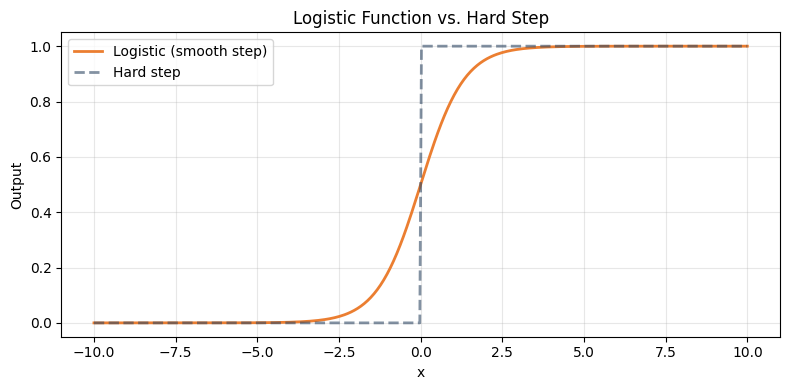

In [18]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 400)
x0 = 0       # Transition center
k = 1.5      # Steepness (increase to make the step sharper)

logistic = 1 / (1 + np.exp(-k * (x - x0)))
hard_step = (x > x0).astype(float)  # For comparison, a hard step function

plt.figure(figsize=(8, 4))
plt.plot(x, logistic, label='Logistic (smooth step)', color="#EB7E31", lw=2)
plt.plot(x, hard_step, '--', label='Hard step', color="#314965", lw=2, alpha=0.6)
plt.xlabel('x')
plt.ylabel('Output')
plt.title('Logistic Function vs. Hard Step')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()